# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [6]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-22 01:32:50--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-22 01:32:50--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip.1’

c

In [7]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [5]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'customer_shopping_data.csv'

## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [9]:
print("\nInformación del DataFrame (columnas y tipos de datos):")
df.info()

print("\nEstadísticas descriptivas de las columnas numéricas:")
display(df.describe())

print("\nEstadísticas descriptivas de las columnas categóricas:")
display(df.describe(include='object'))


Información del DataFrame (columnas y tipos de datos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB

Estadísticas descriptivas de las columnas numéricas:


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000



Estadísticas descriptivas de las columnas categóricas:


,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,797,10
top,I232867,C273973,Female,Clothing,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,34487,44447,159,19943


## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [10]:
# =============================================================================
# 3. LIMPIEZA DE DATOS
# =============================================================================

print("Verificando valores nulos:")
display(df.isnull().sum())

print("\nVerificando filas duplicadas:")
print(df.duplicated().sum())

Verificando valores nulos:


,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0



Verificando filas duplicadas:
0


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [11]:
# =============================================================================
# 4. Creación de Variables Derivadas
# =============================================================================

df['total_value'] = df['quantity'] * df['price']

print("\nDataFrame con la nueva columna 'total_value':")
display(df.head())


DataFrame con la nueva columna 'total_value':


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

Distribución de la Edad:


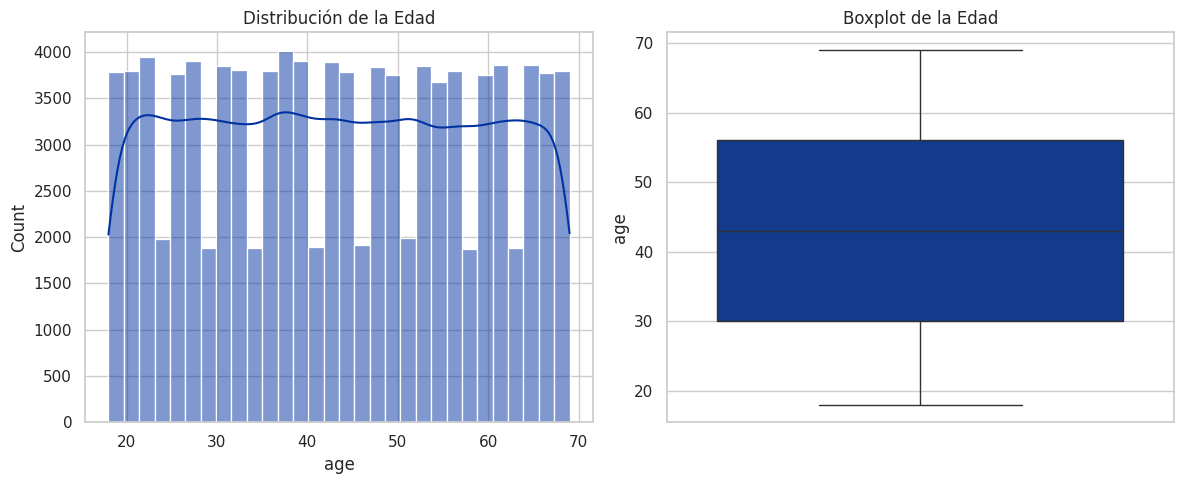


Distribución del Valor Total de Compra:


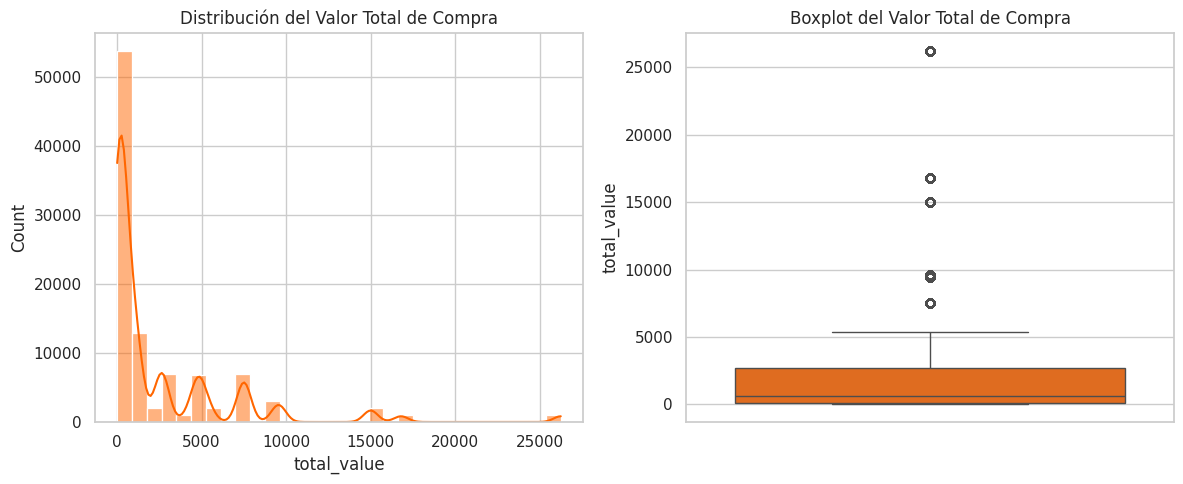

In [12]:
# =============================================================================
# 5. Visualización de Distribuciones
# =============================================================================

# Histograma y Boxplot de la edad
print("Distribución de la Edad:")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True, color=corporate_colors[0])
plt.title('Distribución de la Edad')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['age'], color=corporate_colors[0])
plt.title('Boxplot de la Edad')

plt.tight_layout()
plt.show()

# Histograma y Boxplot del valor total
print("\nDistribución del Valor Total de Compra:")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['total_value'], bins=30, kde=True, color=corporate_colors[1])
plt.title('Distribución del Valor Total de Compra')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['total_value'], color=corporate_colors[1])
plt.title('Boxplot del Valor Total de Compra')

plt.tight_layout()
plt.show()

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [15]:
# =============================================================================
# 7. Definición de Criterios de Segmentación Comportamental
# =============================================================================

print("Distribución por Categoría de Producto:")
display(df['category'].value_counts())

print("\nDistribución por Método de Pago:")
display(df['payment_method'].value_counts())

print("\nDistribución por Centro Comercial:")
display(df['shopping_mall'].value_counts())

Distribución por Categoría de Producto:


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981



Distribución por Método de Pago:


,count
payment_method,
Cash,44447
Credit Card,34931
Debit Card,20079



Distribución por Centro Comercial:


,count
shopping_mall,
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914


## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

Conteo de registros por categoría antes de agrupar:


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981



Conteo de registros por categoría después de agrupar:


,count
category_grouped,
Clothing,34487
Cosmetics,15097
Other,14976
Food & Beverage,14776
Toys,10087
Shoes,10034


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

Conteo de clientes por segmento combinado (ejemplo):


,count
combined_segment,
Adultos_Clothing_Kanyon,2684
Adultos_Clothing_Mall of Istanbul,2667
Mayores_Clothing_Mall of Istanbul,2665
Mayores_Clothing_Kanyon,2561
Mayores_Clothing_Metrocity,2058


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Valor total promedio por segmento combinado (Top 10):


,total_value
combined_segment,
Mayores_Shoes_Forum Istanbul,7654.739657
Adultos_Shoes_Forum Istanbul,7318.094972
Adultos_Shoes_Cevahir AVM,7229.598827
Jóvenes_Shoes_Kanyon,7094.487412
Jóvenes_Shoes_Metropol AVM,7030.226627
Mayores_Shoes_Istinye Park,6955.458527
Mayores_Shoes_Zorlu Center,6876.476085
Adultos_Shoes_Zorlu Center,6828.877306
Jóvenes_Shoes_Mall of Istanbul,6812.238866


## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

*   **¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?**

    Basándonos en el "Valor total promedio por segmento combinado (Top 10)", los segmentos con mayor potencial en términos de valor de compra parecen ser aquellos relacionados con la categoría **Shoes** (Zapatos) en varios centros comerciales, particularmente para los grupos de edad **Mayores** y **Adultos**. Centros comerciales como Forum Istanbul, Cevahir AVM, Kanyon, Metropol AVM, Istinye Park y Zorlu Center destacan en este análisis.

    Para evaluar la frecuencia de compra, necesitaríamos analizar el número de transacciones por cliente dentro de cada segmento. Sin embargo, si asumimos que un mayor valor total promedio puede estar correlacionado con una mayor frecuencia o con compras de mayor valor unitario, estos segmentos de "Shoes" son prometedores.

*   **¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?**

    Para segmentos con bajo valor promedio (por ejemplo, algunos segmentos de "Food & Beverage"), las estrategias podrían enfocarse en:
    *   **Aumentar la frecuencia de compra:** Programas de fidelización, descuentos por compras repetidas, o promociones en productos complementarios.
    *   **Aumentar el valor por transacción:** Ofrecer paquetes o combos de productos, sugerir productos de mayor precio, o implementar estrategias de upselling en el punto de venta.
    *   **Promociones cruzadas:** Si un cliente de bajo valor en una categoría también compra en una categoría de alto valor, se pueden usar promociones cruzadas para fomentar la compra en la categoría de mayor valor.

*   **¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?**

    La **categoría de producto** es un factor muy influyente, como vimos en el análisis del valor total promedio por segmento. La categoría "Shoes" parece generar un alto valor por transacción en comparación con otras categorías. La agrupación de categorías nos ayudó a simplificar el análisis y enfocarnos en las categorías principales y un grupo "Other" para el resto.

    El **centro comercial** también tiene un impacto significativo. Algunos centros comerciales consistently muestran un mayor valor total promedio para ciertos segmentos. Esto podría deberse a la demografía de los visitantes del centro comercial, el tipo de tiendas presentes, o factores económicos. Esta información es crucial para la planificación de campañas de marketing localizadas.

    En resumen, la combinación de la categoría de producto y el centro comercial, junto con el grupo de edad, crea segmentos distintos con comportamientos de compra variados en términos de valor.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

## Conclusiones y Próximos Pasos

Hemos realizado un análisis exploratorio y una segmentación inicial de los clientes basada en criterios demográficos y comportamentales. Identificamos segmentos con mayor valor promedio de compra, particularmente en la categoría de Zapatos para clientes Mayores y Adultos en ciertos centros comerciales.

Para finalizar este ejercicio, el equipo de marketing debe considerar:

*   **Número óptimo de segmentos:** Esto dependerá de la capacidad de la empresa para crear y gestionar campañas diferenciadas. No hay un número único "correcto", sino el que mejor se adapte a los recursos y objetivos. Podrían empezar con los segmentos de mayor valor y expandirse gradualmente.
*   **Asignación de presupuesto:** Se debe priorizar la inversión en los segmentos de mayor potencial (alto valor, alta frecuencia si se analiza) y quizás asignar un presupuesto menor a segmentos de bajo valor para estrategias de crecimiento.
*   **Indicadores de éxito:** Métricas clave podrían incluir el aumento del valor promedio de compra por cliente en el segmento, la frecuencia de compra, la tasa de conversión de campañas dirigidas, y la retención de clientes en esos segmentos.

**Actividad Final Sugerida:**

1.  **Segmento seleccionado:** Basándonos en el análisis, el segmento **Mayores_Shoes_Forum Istanbul** o **Adultos_Shoes_Forum Istanbul** (y otros segmentos de Shoes con alto valor promedio) parecen tener un alto potencial de valor. Para la actividad final, seleccionemos uno de estos, por ejemplo, **Mayores_Shoes_Forum Istanbul**.

2.  **Estrategia propuesta:**
    *   **Campaña:** Implementar una campaña de email marketing y SMS dirigida a clientes identificados en este segmento.
    *   **Contenido:** Promocionar nuevas llegadas de calzado de alta gama, ofrecer descuentos exclusivos en marcas premium de zapatos, oinvitar a eventos especiales en la tienda de Forum Istanbul.
    *   **Ofertas personalizadas:** Considerar ofertas basadas en el historial de compras previas dentro de la categoría de zapatos.

3.  **Justificación y Monitoreo:**
    *   **Justificación:** Este segmento ha mostrado el mayor valor promedio de compra, indicando una disposición a invertir en calzado. Focalizar esfuerzos aquí tiene el potencial de generar un alto retorno de la inversión.
    *   **Monitoreo:** Se monitorizará el desempeño de la campaña midiendo:
        *   Tasa de apertura y clics en emails.
        *   Tasa de conversión (compras realizadas por miembros del segmento tras la campaña).
        *   Valor promedio de compra post-campaña en este segmento.
        *   Número de transacciones de clientes del segmento.

Este es un punto de partida para la discusión. ¡Analicen en grupo y ajusten las estrategias según sus propios criterios!